<center>Учреждение образования</center>
<center>«Белорусский государственный университет информатики и радиоэлектроники»</center>
<br><br>
<center>Кафедра информатики</center>
<br><br><br><br><br><br><br><br><br><br>
<center>Лабораторная работа №5</center>
<center>Метод опорных векторов</center>
<br><br><br><br><br><br><br><br>

<p style='text-align: right;'>
Выполнил:
Полевой Александр Вадимович <br>
магистрант кафедры информатики <br>      
группа № 858641	
<br><br><br><br>
Проверил:     Стержанов Максим Валерьевич
</p>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<center>
Минск 2019
</center>


In [3]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

Набор данных ex5data1.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные являются линейно разделимыми.

**1. Загрузите данные ex5data1.mat из файла.**

In [4]:
data = scipy.io.loadmat('data/ex5data1.mat')

In [5]:
X = data['X'] 
y = data['y']

**2. Постройте график для загруженного набора данных: по осям - переменные X1, X2, а точки, принадлежащие различным классам должны быть обозначены различными маркерами.**

In [6]:
def draw_data(X, y):
    pos = X[np.where(y==1)[0]]
    neg = X[np.where(y==0)[0]]

    plt.figure(figsize=(8,5))
    plt.scatter(pos[:,0], pos[:,1], marker='o', facecolors='none', edgecolors='b')
    plt.scatter(neg[:,0], neg[:,1], c='r', marker='x')

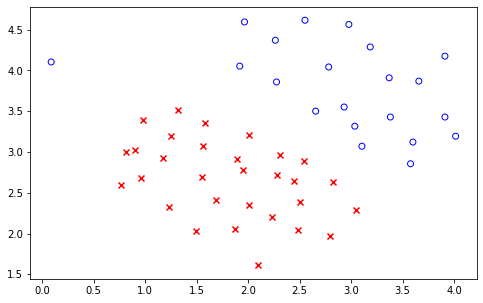

In [7]:
draw_data(X, y)

**3. Обучите классификатор с помощью библиотечной реализации SVM с линейным ядром на данном наборе.**

In [8]:
linear_svm_c1 = svm.SVC(C=1, kernel='linear')
linear_svm_c1.fit( X, y.flatten() )

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

**4. Постройте разделяющую прямую для классификаторов с различными параметрами C = 1, C = 100 (совместно с графиком из пункта 2). Объясните различия в полученных прямых?**

In [9]:
def draw_decision_boundry(svm, X, y):
    fig = plt.figure(figsize=(8,5))
    ax = plot_decision_regions(X, y.flatten(), clf=svm, markers='xo', colors='r,b', hide_spines=False)
    plt.show()

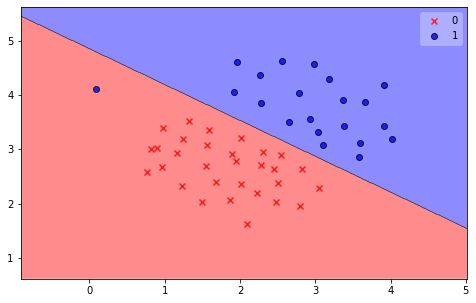

In [10]:
draw_decision_boundry(linear_svm_c1, X, y)

In [11]:
linear_svm_c100 = svm.SVC(C=100, kernel='linear')
linear_svm_c100.fit( X, y.flatten() )

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

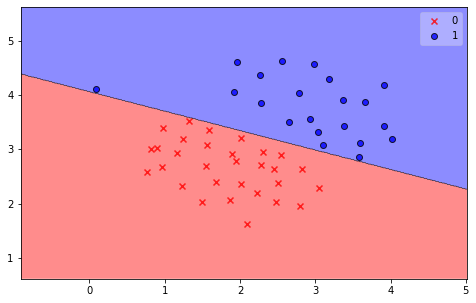

In [12]:
draw_decision_boundry(linear_svm_c100, X, y)

При C = 1 алгоритм попытался поулчить наибольший "margin" между классами, при этом некоторые "выбросы" были классифицированы ошибочно, но общий паттерн алгоритм определил. При C = 100 видно, что верно были классифицированы все данные, но "margin" сильно уменьшился. Видно, что модель страдает от переобучения (overfitting high variance)

**5. Реализуйте функцию вычисления Гауссового ядра для алгоритма SVM.**

In [13]:
def gaussian_kernel_similarity(x1, l1, sigma):
    diff = x1 - l1 
    
    numerator = np.dot(diff.T, diff) # нужно взять корень квадратный а потом возьвести в 2 степень
    
    denominator = (2 * (sigma ** 2))
    
    return np.exp(-numerator/ denominator)

In [14]:
gaussian_kernel_similarity(np.array([3, 3, 3]),np.array([1, 1, 1]), 2)

0.22313016014842982

In [15]:
def create_gaussian_f(X, L, sigma):
    xm = len(X)
    lm = len(L)
    fs = np.zeros([xm, lm])
    for xi in range(xm):
        x = X[xi]
        for lj in range(lm):
            l = L[lj]
            fs[xi][lj] = gaussian_kernel_similarity(x, l, sigma)
    
    return fs

Набор данных ex5data2.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные являются нелинейно разделимыми.

**6. Загрузите данные ex5data2.mat из файла.**

In [16]:
data2 = scipy.io.loadmat('data/ex5data2.mat')

In [17]:
X2 = data2['X']
y2 = data2['y']

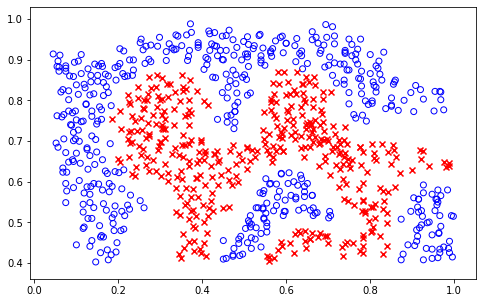

In [18]:
draw_data(X2, y2)

In [19]:
sigma_ex2 = 0.1

In [20]:
F = create_gaussian_f(X2, X2, sigma_ex2)
F.shape

(863, 863)

In [21]:
svm_ex_2 = svm.SVC(C=1, kernel='linear')
svm_ex_2.fit( F, y2.flatten() )

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: No contour levels were found within the data range.
  from ipykernel import kernelapp as app


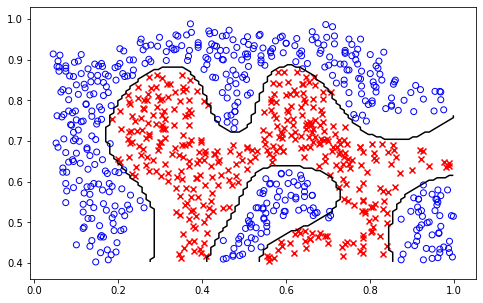

In [22]:
def visualize_boundary(L, y, svm, sigma):
    draw_data(L, y)

    x1_greed = np.linspace(L[:,0].min(), L[:,0].max(), 100)
    x2_greed = np.linspace(L[:,1].min(), L[:,1].max(), 100)
    
    X1, X2 = np.meshgrid(x1_greed, x2_greed)    
    Z = np.zeros(X1.shape)

    for i in range(X1.shape[1]):
        x = np.column_stack((X1[:, i], X2[:, i]))
        f = create_gaussian_f(x, L, sigma)
        Z[:, i] = svm.predict(f)

    plt.contour(X1, X2, Z, colors="black", levels=[0,0])
    plt.show(block=False)
    
visualize_boundary(X2, y2, svm_ex_2, sigma_ex2)

**Альтернативный вариант**

rbf => K(x, y) = exp(-gamma ||x-y||^2)

https://scikit-learn.org/stable/modules/metrics.html#rbf-kernel

The function rbf_kernel computes the radial basis function (RBF) kernel between two vectors. This kernel is defined as:
$$k(x, y) = \exp( -\gamma \| x-y \|^2)$$
where x and y are the input vectors. If $\gamma = \sigma^{-2}$ the kernel is known as the Gaussian kernel of variance .

In [23]:
def sigma_to_gamma_ang(sigma):
    return np.power(sigma, -2.) / 2

sigma_to_gamma_ang(2)

0.125

In [24]:
svm_ex_2_alt = svm.SVC(C=1, kernel='rbf', gamma=sigma_to_gamma_ang(sigma_ex2))
svm_ex_2_alt.fit( X2, y2.flatten() )

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

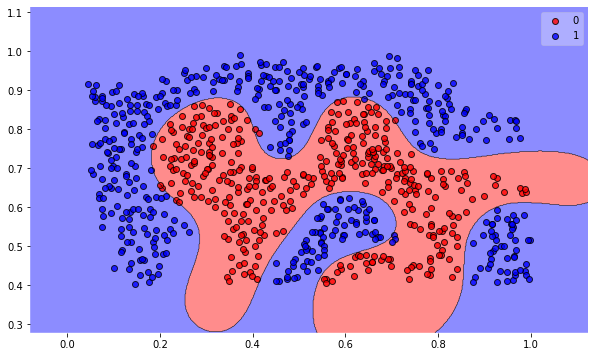

In [25]:
fig = plt.figure(figsize=(10, 6))
ax = plot_decision_regions(X2, y2.flatten(), clf=svm_ex_2_alt, markers='o', colors='r,b', zoom_factor=8)
plt.show()

Набор данных ex5data3.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные разделены на две выборки: обучающая выборка (X, y), по которой определяются параметры модели; валидационная выборка (Xval, yval), на которой настраивается коэффициент регуляризации и параметры Гауссового ядра.

**10. Загрузите данные ex5data3.mat из файла.**

In [26]:
data3 = scipy.io.loadmat('data/ex5data3.mat')

In [27]:
X3_train = data3['X']
y3_train = data3['y']
X3_val = data3['Xval']
y3_val = data3['yval']

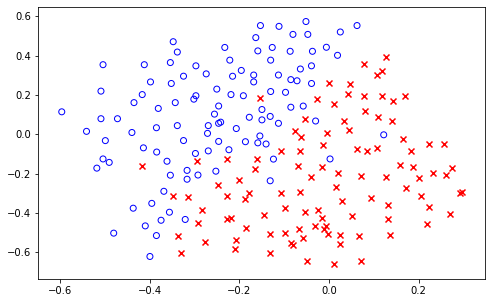

In [28]:
draw_data(X3_train, y3_train)

**11. Вычислите параметры классификатора SVM на обучающей выборке, а также подберите параметры C и σ2 на валидационной выборке.**

In [29]:
C_vals = [0.01, 0.04, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10, 20, 40, 80, 100]
sigma_vals = [0.01, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.4, 0.8, 1, 2, 5, 10, 20, 40, 80, 100]

In [30]:
best_score = 0
params = {
    'C': 0,
    'sigma': 0
}

for C in C_vals:
    for sigma in sigma_vals:
        model = svm.SVC(C=C, kernel='rbf', gamma=sigma_to_gamma_ang(sigma))
        model.fit(X3_train, y3_train.flatten())
        score = model.score(X3_val, y3_val)
        if score > best_score:
            best_score = score
            params['C'] = C
            params['sigma'] = sigma
            
print(f"Best combination score {best_score}: С = {params['C']}, sigma = {params['sigma']}")

Best combination score 0.97: С = 0.3, sigma = 0.08


**12. Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).**

In [31]:
best_model = svm.SVC(C=params['C'], kernel='rbf', gamma=sigma_to_gamma_ang(params['sigma']))
best_model.fit(X3_train, y3_train.flatten())

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=78.125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

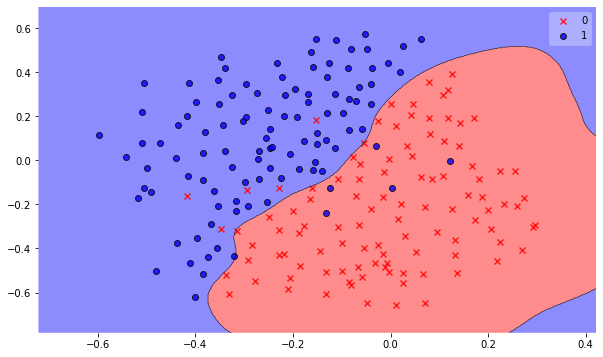

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = plot_decision_regions(X3_train, y3_train.flatten(), clf=best_model, markers='xo', colors='r,b', zoom_factor=8)
plt.show()

**13. Загрузите данные spamTrain.mat из файла.**

In [33]:
data1 = scipy.io.loadmat('data/spamTrain.mat')
X1 = data1['X']
y1 = data1['y']

X1.shape

(4000, 1899)

**14. Обучите классификатор SVM.**

In [34]:
model1 = svm.SVC(C=0.5, kernel='linear')
model1.fit( X1, y1.flatten() )
print('spamTrain accuracy: ', (model1.score(X1, y1.flatten())) * 100)

spamTrain accuracy:  99.97500000000001


Набор данных spamTest.mat представляет собой файл формата .mat (т.е. сохраненного из Matlab). Набор содержит две переменные Xtest - вектор, кодирующий отсутствие (0) или присутствие (1) слова из словаря vocab.txt в письме, и ytest - метка класса: 0 - не спам, 1 - спам. Набор используется для проверки качества классификатора.

**15. Загрузите данные spamTest.mat из файла.**

In [35]:
data2 = scipy.io.loadmat('data/spamTest.mat')
X1_test = data2['Xtest']
y1_test = data2['ytest']

print('spamTest accuracy: ', (model1.score(X1_test, y1_test.flatten())) * 100)

spamTest accuracy:  97.6


In [36]:
print('spamTest accuracy: ', (model1.score(X1_test, y1_test.flatten())) * 100)

spamTest accuracy:  97.6


**16. Подберите параметры C и σ2**

In [ ]:
from IPython.display import clear_output, display

#gauss

def sigma_to_gamma_ang(sigma):
    return np.power(sigma, -2.) / 2

C_vals = [0.01, 0.04, 0.08, 0.1, 0.2, 0.3]
sigma_vals = [0.01, 0.04, 0.05, 0.06, 0.07, 0.08]


best_score = 0
params = {
    'C': 0,
    'sigma': 0
}

total_iter = len(C_vals) * len(sigma_vals)

i = 0
for C in C_vals:
    for sigma in sigma_vals:
        clear_output(wait=True)
        i += 1
        print(f'Current progress: {i}/{total_iter}')
        model = svm.SVC(C=C, kernel='rbf', gamma=sigma_to_gamma_ang(sigma))
        model.fit(X1, y1.flatten())
        score = model.score(X1_test, y1_test)
        if score > best_score:
            best_score = score
            params['C'] = C
            params['sigma'] = sigma
            
print(f"Best combination score {best_score}: С = {params['C']}, sigma = {params['sigma']}")

#linear core

best_score_linear = 0
params_linear_С = 0

total_iter_linear = len(C_vals)

i = 0
for C in C_vals:
    clear_output(wait=True)
    i += 1
    print(f'Current progress: {i}/{total_iter_linear}')
    model = svm.SVC(C=C, kernel='linear')
    model.fit(X1, y1.flatten())
    score = model.score(X1_test, y1_test)
    if score > best_score_linear:
        best_score_linear = score
        params_linear_С = C
            
print(f"Best combination score {best_score_linear}: С = {params_linear_С}")

**17. Реализуйте функцию предобработки текста письма, включающую в себя**

In [ ]:
def prepare_text(text):
    import re
    
    text = text.lower() 
    text = re.sub('<a .*href="([^"]*)".*?<\/a>', r' \1 ', text)
    text = re.sub('<[^<>]+>', ' ', text) 
    text = re.sub('(http|https)://[^\s]*', ' httpaddr ', text)
    text = re.sub('[^\s]+@[^\s]+', ' emailaddr ', text)
    text = re.sub('[0-9]+', ' number ', text)    
    text = re.sub('[$]+', ' dollar ', text)   
    text = re.sub('[_]+', ' ', text)
    text = re.sub('[^\w]', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip()
    stemmer = nltk.stem.porter.PorterStemmer()
    words = text.split()
    stemmed_words = []
    for word in words:
        stemmed = stemmer.stem(word)
        if not len(stemmed): continue
        stemmed_words.append(stemmed)
        
    return ' '.join(stemmed_words)

prepare_text("discounted №4843,,(03240.%\"№:304-235!\"№%:,.;()_+=_-Unknown text here <p>p-tag</p><a href='https://lnk.com'>click here</a> THIS is xedinaska@gmail.com 2019 and 7 his cost 15")

**18. Загрузите коды слов из словаря vocab.txt.**

In [ ]:
def load_vocab(filename):
    dict = {}
    with open(filename) as f:
        for line in f:
            (val, key) = line.split()
            dict[key] = int(val)
    return dict

vocab = load_vocab('data/vocab.txt')

**19. Реализуйте функцию замены слов в тексте письма после предобработки на их соответствующие коды.**

In [ ]:
def text_to_vec(text, vocab):
    n = len(vocab.keys())
    vec = np.zeros(n)
    
    words = prepare_text(text).split()
    for word in words:
        if word not in vocab: continue
        idx = vocab[word]
        vec[idx-1] = 1
        
    return vec.reshape(1, -1)

t_v = text_to_vec('here is my own email, beauti beautiful day of week', vocab)
print(np.unique(t_v, return_counts=True))
t_v.shape

**20. Реализуйте функцию преобразования текста письма в вектор признаков (в таком же формате как в файлах spamTrain.mat и spamTest.mat).**

In [ ]:
def file_to_vec(filename, vocab):
    text = open(filename,'r').read()
    
    return text_to_vec(text, vocab)

**21. Проверьте работу классификатора на письмах из файлов emailSample1.txt, emailSample2.txt, spamSample1.txt и spamSample2.txt.**

In [ ]:
gauss_best_C = 5
gauss_best_sigma = 10

best_gaussian_model = svm.SVC(C=gauss_best_C, kernel='rbf', gamma=sigma_to_gamma_ang(gauss_best_sigma))
best_gaussian_model.fit(X1, y1.flatten())

In [ ]:
best_C = 0.04

best_linear_model = svm.SVC(C=best_C, kernel='linear')
best_linear_model.fit(X1, y1.flatten())

emails_data = [
    ['data/emailSample1.txt', 0],
    ['data/emailSample2.txt', 0],
    ['data/spamSample1.txt', 1],
    ['data/spamSample2.txt', 1],
]

In [ ]:
def predict_files(model, data):
    total = len(data)
    correct = 0
    for i in range(len(data)):
        item = data[i]
        email_vec = file_to_vec(item[0], vocab)
        y_pred = model.predict(email_vec)
        if (y_pred == item[1]): correct += 1
        print(f"File: {item[0]} - {item[1]}. Predicted: {y_pred}")
    
    accuracy = round(correct/total, 4)
    print('---------------------------')
    print(f'Accurecy: {accuracy * 100}%')
    
print('Predict with Linear kernel')
predict_files(best_linear_model, emails_data)

In [ ]:
print('Predict with Gaussian kernel')
predict_files(best_gaussian_model, emails_data)

**Вывод** 

Метод Опорных Векторов или SVM (от англ. Support Vector Machines) — это линейный алгоритм используемый в задачах классификации и регрессии. Данный алгоритм имеет широкое применение на практике и может решать как линейные так и нелинейные задачи. Суть работы “Машин” опорных векторов проста: алгоритм создает линию или гиперплоскость, которая разделяет данные на классы.

Основной задачей алгоритма является найти наиболее правильную линию, или гиперплоскость разделяющую данные на два класса. SVM это алгоритм, который получает на входе данные, и возвращает такую разделяющую линию.